In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
submission_validation = pd.read_csv('/Users/jerem/cours_esiee_paris/E4/kaggle_walmart/submission/submission_prophet2.csv')
sale_df = pd.read_csv("/Users/jerem/cours_esiee_paris/E4/kaggle_walmart/data/sales_train_validation.csv")
cal_df = pd.read_csv("/Users/jerem/cours_esiee_paris/E4/kaggle_walmart/data/calendar.csv")


In [10]:
cal_df

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0


In [13]:
columns = sale_df.columns

d_cols = columns[columns.str.contains("d_")]

In [34]:
STRING_TEST = 'FOODS_3_090_WI_3_validation'

In [43]:
sale_id = sale_df[sale_df['id']== STRING_TEST].set_index('id')[d_cols].T.merge(
    cal_df.set_index('d')['date'],
           left_index=True,
           right_index=True,
            validate='1:1'
).set_index('date')

In [44]:
#fig, axs = plt.subplots(10, 2, figsize=(15, 20))
#axs = axs.flatten()
#ax_idx = 0
#for item in twenty_examples.columns:
#    twenty_examples[item].plot(title=item,
#                              color='red',
#                              ax=axs[ax_idx])
#    ax_idx += 1
#plt.tight_layout()
#plt.show()

In [88]:
sale_id_cut = sale_id[1211:]

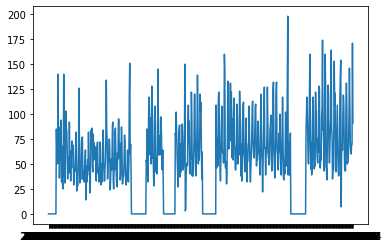

In [89]:
fig = plt.plot(sale_id_cut.index, 'FOODS_3_090_WI_3_validation', data=sale_id_cut)

In [101]:
from datetime import timedelta
columns = sale_df.columns
date_columns = columns[columns.str.contains("d_")]
dates_s = [pd.to_datetime(cal_df.loc[cal_df['d'] == str_date,'date'].values[0]) for str_date in date_columns]

def CreateTimeSeries(id):
    item_series =  sale_df[sale_df['id'] == id]
    dates = pd.DataFrame({'ds': dates_s}, index=range(len(dates_s)))
    dates['y'] = item_series[date_columns].values.transpose()      
    validation_row = submission_validation[submission_validation['id'] == id]
    validation_row = validation_row.set_index('id')
    for column in validation_row:
        time_1 = dates['ds'].iloc[-1] + timedelta(days=1)
    
        new_row_from_validation = {'ds': time_1, 'y': int(round(validation_row[column][0],0))}
        dates = dates.append(new_row_from_validation, ignore_index= True)
    return dates

In [100]:
serie_with_prediction = CreateTimeSeries(STRING_TEST)
serie_with_prediction_cut = serie_with_prediction[1211:]

/Users/jerem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning:

Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.



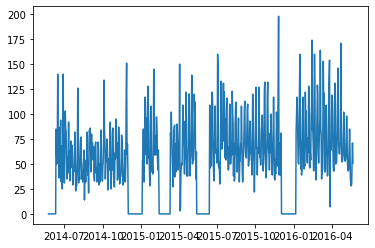

In [91]:
fig_pred = plt.plot('ds', 'y', data=serie_with_prediction_cut)